# **Chargement des bibliothèques et des données**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

In [3]:
df = pd.read_csv("explored_data.csv")
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


# **Nettoyage des données**

## **Gérer les valeurs manquantes**

In [4]:
df.isnull().sum()

cust_id                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd                       0
enquiry_count                   0
credit_utilization_ratio        0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 62
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date

In [5]:
df['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [6]:
(52 / df.shape[0]) * 100

0.104

In [7]:
df.dropna(inplace = True)
df.isnull().sum()

cust_id                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installmen

In [8]:
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [9]:
df.shape

(49938, 32)

## **Vérifiez s'il y a des incohérences de données ou des valeurs inappropriées**

In [10]:
cat_cols = ['gender', 'marital_status', 'employment_status', 'residence_type', 'loan_purpose', 'loan_type', 'default']

for column in cat_cols:
  print(f"For {column}: {df[column].unique()}\n")

For gender: ['M' 'F']

For marital_status: ['Married' 'Single']

For employment_status: ['Self-Employed' 'Salaried']

For residence_type: ['Owned' 'Mortgage' 'Rented']

For loan_purpose: ['Auto' 'Home' 'Personal' 'Education' 'Personaal']

For loan_type: ['Secured' 'Unsecured']

For default: [False  True]



In [11]:
df['loan_purpose']=df['loan_purpose'].replace({'Personaal': 'Personal'})

for column in cat_cols:
  print(f"For {column}: {df[column].unique()}\n")

For gender: ['M' 'F']

For marital_status: ['Married' 'Single']

For employment_status: ['Self-Employed' 'Salaried']

For residence_type: ['Owned' 'Mortgage' 'Rented']

For loan_purpose: ['Auto' 'Home' 'Personal' 'Education']

For loan_type: ['Secured' 'Unsecured']

For default: [False  True]



## **Types de données corrects**

In [12]:
df.dtypes

cust_id                         object
number_of_open_accounts          int64
number_of_closed_accounts        int64
total_loan_months                int64
delinquent_months                int64
total_dpd                        int64
enquiry_count                    int64
credit_utilization_ratio         int64
age                              int64
gender                          object
marital_status                  object
employment_status               object
income                           int64
number_of_dependants             int64
residence_type                  object
years_at_current_address         int64
city                            object
state                           object
zipcode                          int64
loan_purpose                    object
loan_type                       object
sanction_amount                  int64
loan_amount                      int64
processing_fee                 float64
gst                              int64
net_disbursement         

In [13]:
df['zipcode'] = df['zipcode'].astype(str)  # Converts to string
df.dtypes

cust_id                         object
number_of_open_accounts          int64
number_of_closed_accounts        int64
total_loan_months                int64
delinquent_months                int64
total_dpd                        int64
enquiry_count                    int64
credit_utilization_ratio         int64
age                              int64
gender                          object
marital_status                  object
employment_status               object
income                           int64
number_of_dependants             int64
residence_type                  object
years_at_current_address         int64
city                            object
state                           object
zipcode                         object
loan_purpose                    object
loan_type                       object
sanction_amount                  int64
loan_amount                      int64
processing_fee                 float64
gst                              int64
net_disbursement         

In [14]:
# Convert to datetime and extract the date
df['disbursal_date'] = pd.to_datetime(df['disbursal_date'])
df['installment_start_dt'] = pd.to_datetime(df['installment_start_dt'])

df.dtypes

cust_id                                object
number_of_open_accounts                 int64
number_of_closed_accounts               int64
total_loan_months                       int64
delinquent_months                       int64
total_dpd                               int64
enquiry_count                           int64
credit_utilization_ratio                int64
age                                     int64
gender                                 object
marital_status                         object
employment_status                      object
income                                  int64
number_of_dependants                    int64
residence_type                         object
years_at_current_address                int64
city                                   object
state                                  object
zipcode                                object
loan_purpose                           object
loan_type                              object
sanction_amount                   

In [15]:
df['disbursal_date'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
49995    2024
49996    2024
49997    2024
49998    2024
49999    2024
Name: disbursal_date, Length: 49938, dtype: int32

In [16]:
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


## **Vérifier les doublons**

In [17]:
df.duplicated().sum()

np.int64(0)

## **Gestion des valeurs aberrantes**

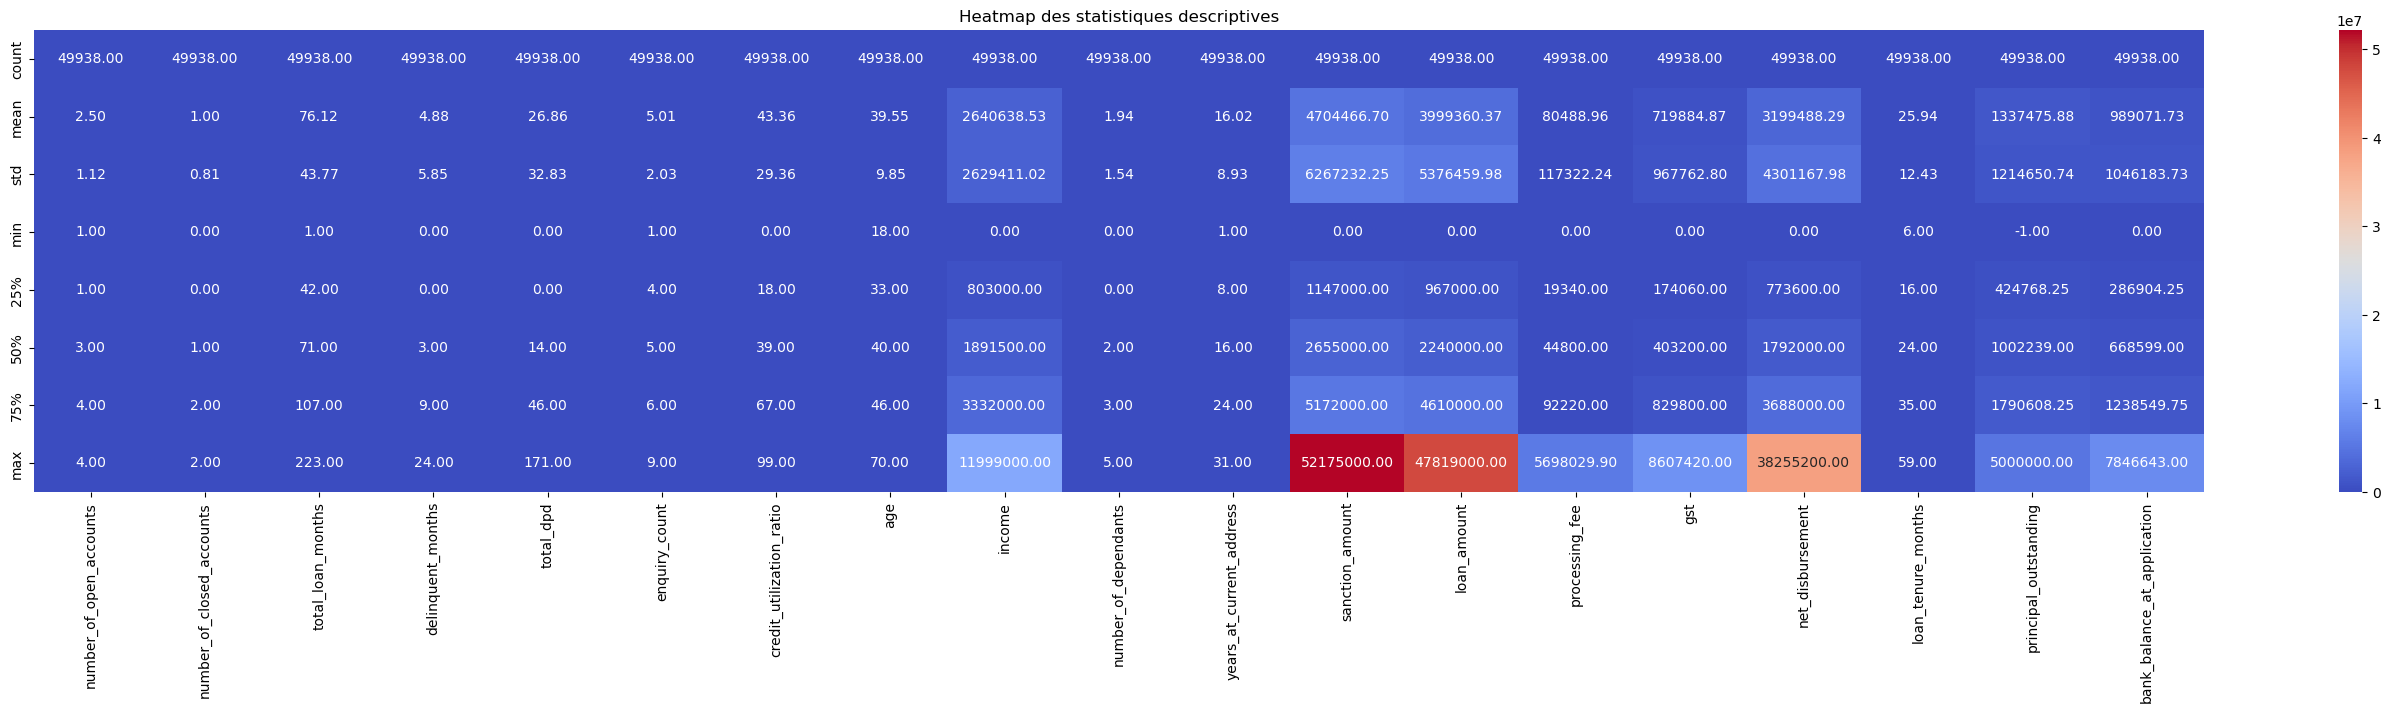

In [18]:
# Filtrer les colonnes numériques
numeric_data = df.select_dtypes(include=['number'])

# Générer les statistiques descriptives
summary_stats = numeric_data.describe()

# Tracer la heatmap
plt.figure(figsize=(35, 6))  # Ajuster la taille si nécessaire
sns.heatmap(summary_stats, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Heatmap des statistiques descriptives")
plt.show()


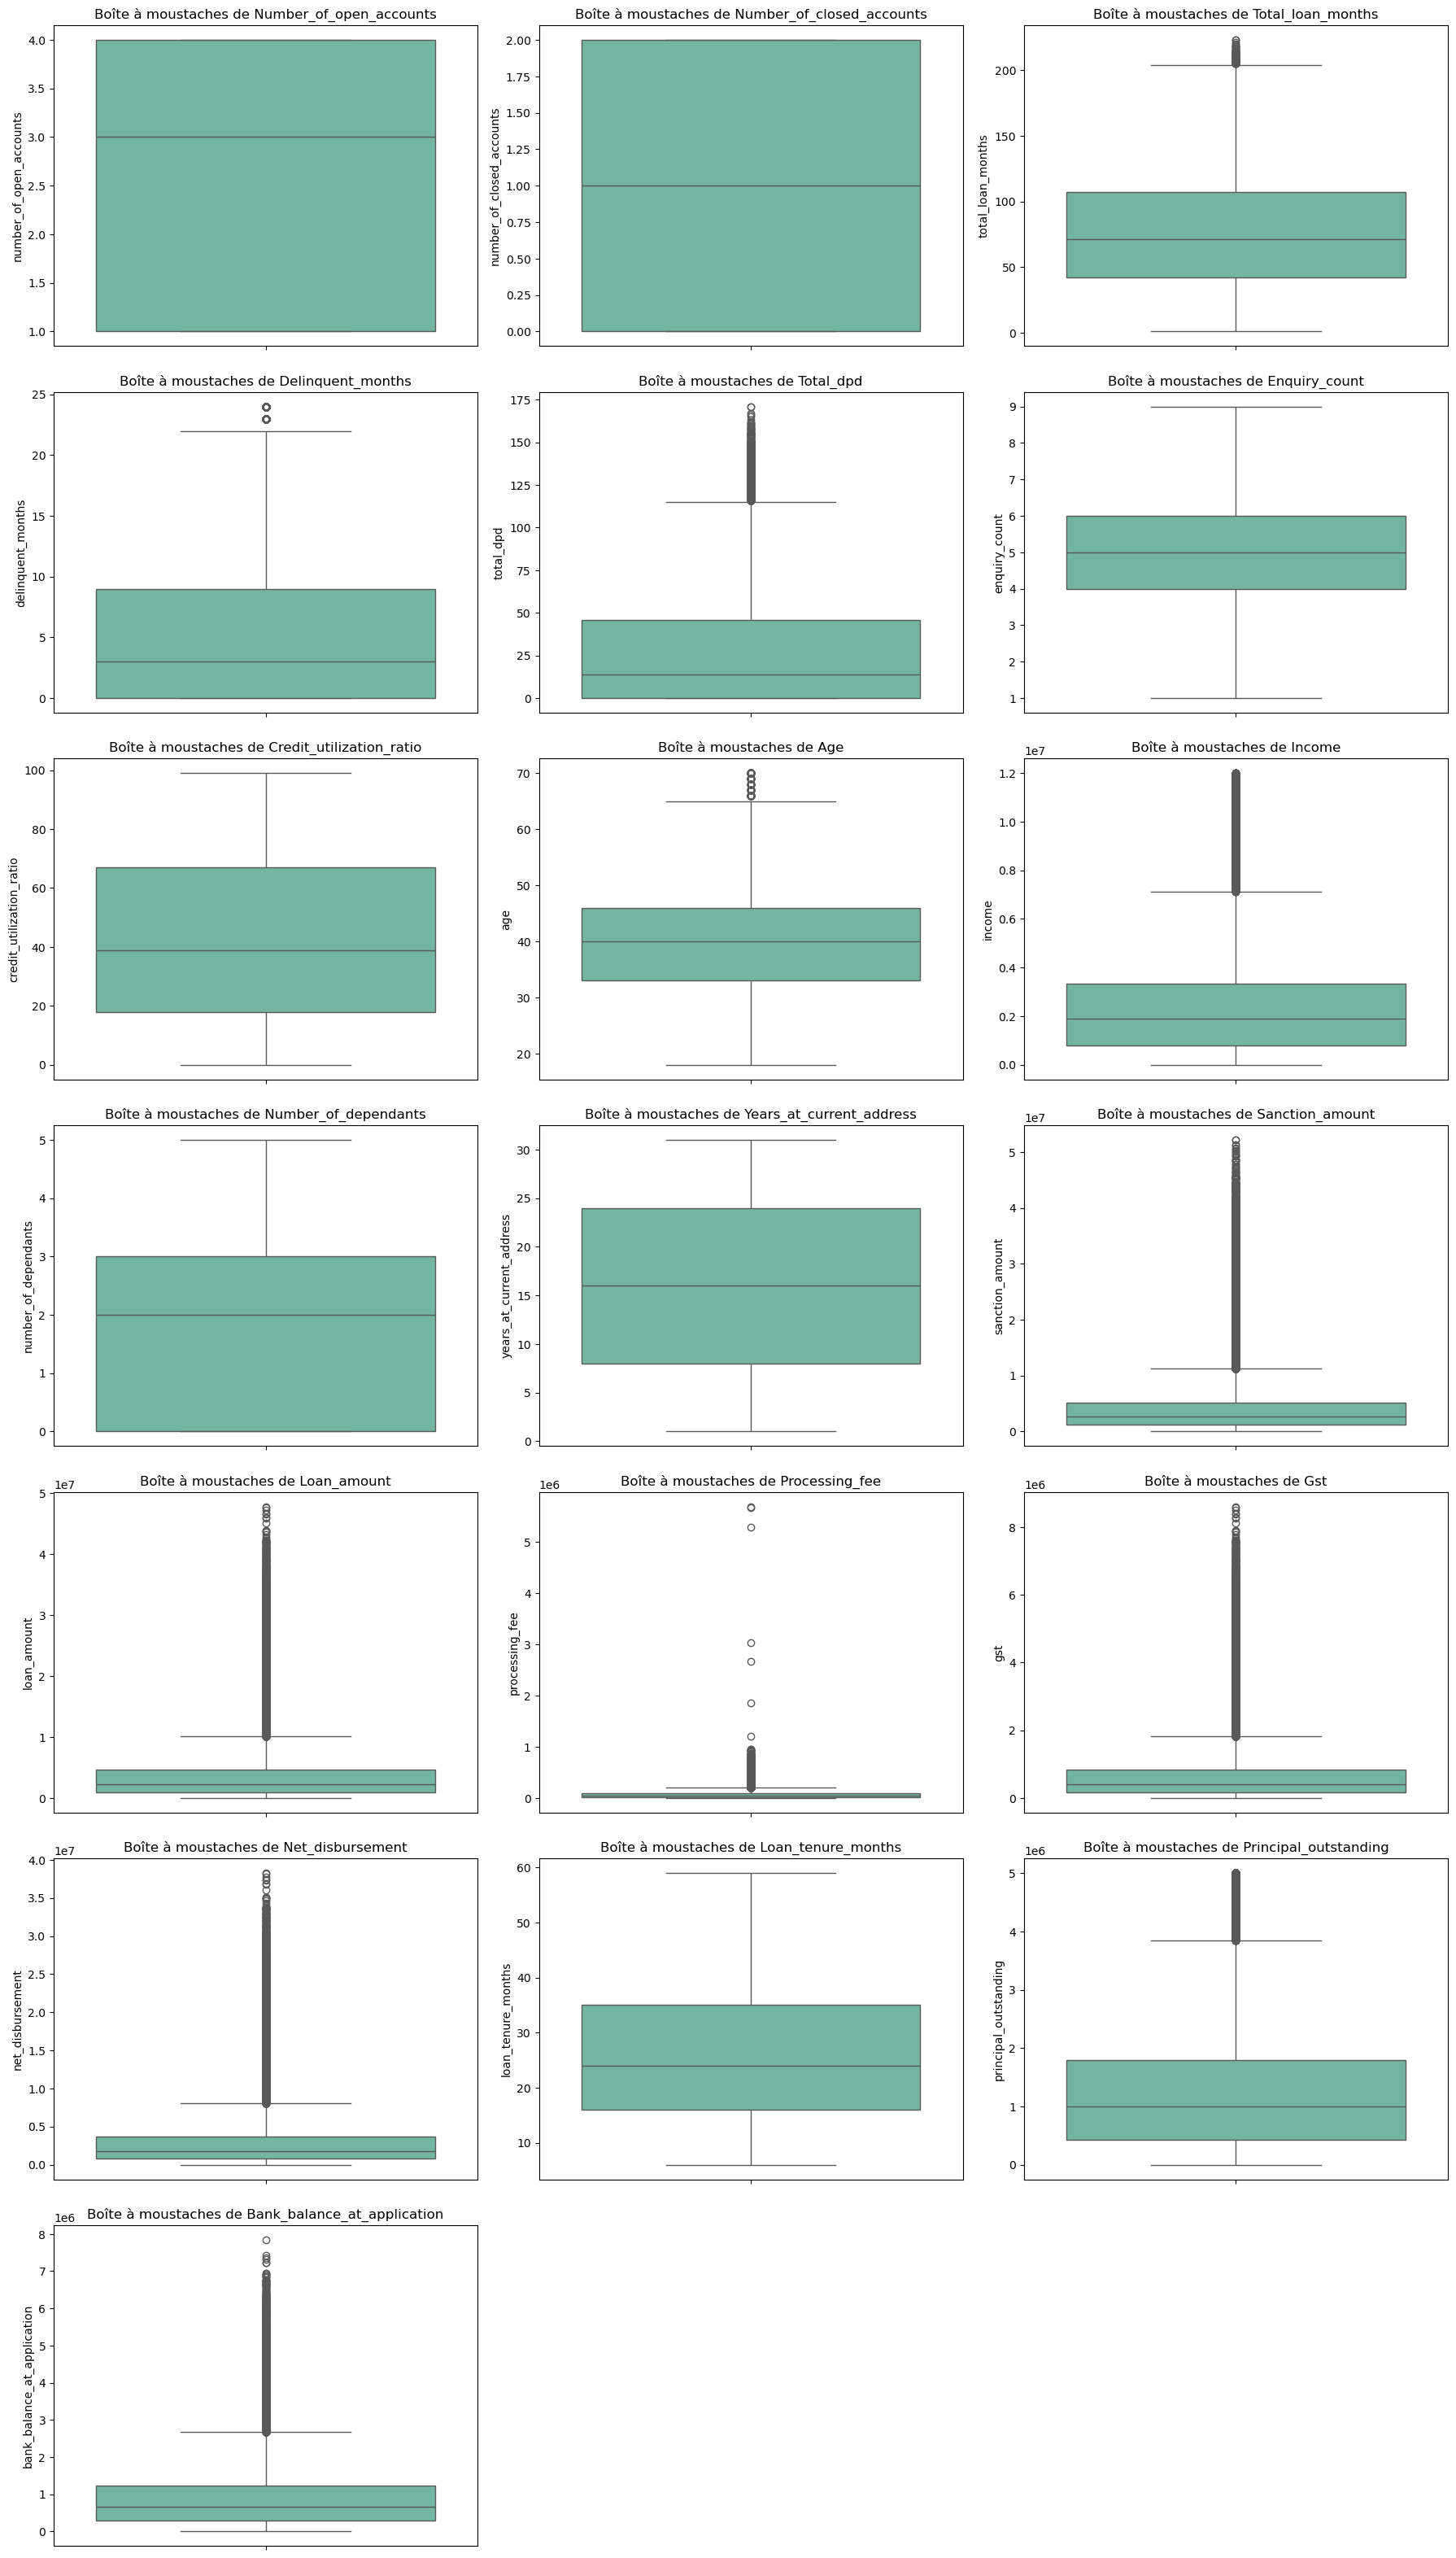

In [19]:
# Liste des colonnes numériques
num_cols = df.select_dtypes(include=['number']).columns

# Création d'une grille de sous-graphiques 8x3
fig, axes = plt.subplots(8, 3, figsize=(18, 36))  # Ajuster la taille si nécessaire
axes = axes.flatten()  # Aplatir la grille pour un indexage plus simple

# Tracer chaque colonne numérique
for i, column in enumerate(num_cols):
    sns.boxplot(data=df, y=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f"Boîte à moustaches de {column.capitalize()}")

# Supprimer les sous-graphiques vides (le cas échéant)
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

# Ajuster la mise en page
plt.tight_layout()
plt.show()


In [20]:
df['age'].quantile([0.25, 0.75])

0.25    33.0
0.75    46.0
Name: age, dtype: float64

In [21]:
def iqr(column):
    """
    Calcule l’intervalle interquartile (IQR) et détermine les bornes inférieure et supérieure pour la détection des valeurs aberrantes.

    Paramètres :
    column (str) : Nom de la colonne du DataFrame pour laquelle l’IQR et les bornes sont calculés.

    Retour :
    None : Affiche les bornes inférieure et supérieure de la colonne.
    """
    q1, q3 = df[column].quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    print(f"Borne inférieure : {lower_bound} et Borne supérieure : {upper_bound}\n")


In [22]:
for column in num_cols:
  print(f"For {column}: {iqr(column)}")

Borne inférieure : -3.5 et Borne supérieure : 8.5

For number_of_open_accounts: None
Borne inférieure : -3.0 et Borne supérieure : 5.0

For number_of_closed_accounts: None
Borne inférieure : -55.5 et Borne supérieure : 204.5

For total_loan_months: None
Borne inférieure : -13.5 et Borne supérieure : 22.5

For delinquent_months: None
Borne inférieure : -69.0 et Borne supérieure : 115.0

For total_dpd: None
Borne inférieure : 1.0 et Borne supérieure : 9.0

For enquiry_count: None
Borne inférieure : -55.5 et Borne supérieure : 140.5

For credit_utilization_ratio: None
Borne inférieure : 13.5 et Borne supérieure : 65.5

For age: None
Borne inférieure : -2990500.0 et Borne supérieure : 7125500.0

For income: None
Borne inférieure : -4.5 et Borne supérieure : 7.5

For number_of_dependants: None
Borne inférieure : -16.0 et Borne supérieure : 48.0

For years_at_current_address: None
Borne inférieure : -4890500.0 et Borne supérieure : 11209500.0

For sanction_amount: None
Borne inférieure : -44

In [23]:
df.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [24]:
np.round(df['income'].describe(), 2)

count       49938.00
mean      2640638.53
std       2629411.02
min             0.00
25%        803000.00
50%       1891500.00
75%       3332000.00
max      11999000.00
Name: income, dtype: float64

In [25]:
df['income'].quantile(0.99)

np.float64(11459000.0)

In [26]:
df = df[df['income'] <= df['income'].quantile(0.99)]
np.round(df['income'].describe(), 2)

count       49439.00
mean      2548857.50
std       2477966.54
min             0.00
25%        796000.00
50%       1868000.00
75%       3283000.00
max      11459000.00
Name: income, dtype: float64

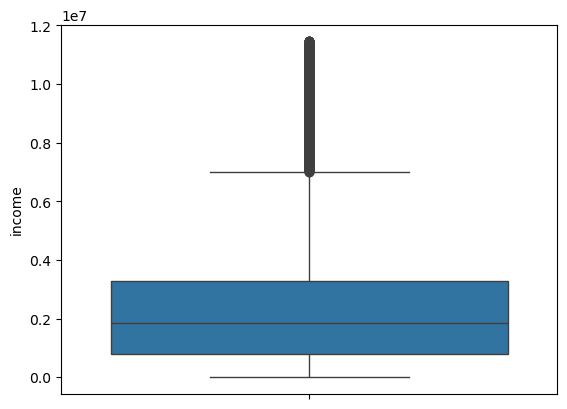

In [27]:
sns.boxplot(data = df, y = 'income');

In [28]:
df.shape

(49439, 32)

In [29]:
df['diff'] = df['loan_amount'] - df['processing_fee']
df['pct'] = (df['processing_fee'] / df['loan_amount']) * 100
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,diff,pct
0,C00001,1,1,42,0,0,3,7,44,M,...,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False,2417660.0,2.0
1,C00002,3,1,96,12,60,5,4,38,M,...,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False,3805340.0,2.0
2,C00003,2,1,82,24,147,6,58,46,F,...,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False,2126600.0,2.0
3,C00004,3,0,115,15,87,5,26,55,F,...,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False,1712060.0,2.0
4,C00005,4,2,120,0,0,5,10,37,M,...,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False,4429600.0,2.0


In [30]:
df[df['diff'] < 0].shape[0]

7

In [31]:
np.round(df[['loan_amount', 'processing_fee', 'diff', 'pct']].describe(), 2)

,loan_amount,processing_fee,diff,pct
count,49439.00,49439.00,49439.00,49431.00
mean,3875197.58,78010.77,3797186.81,2.02
std,5079877.02,112021.33,4978555.18,1.49
min,0.00,0.00,-1866020.86,2.00
25%,957000.00,19140.00,936880.00,2.00
50%,2210000.00,44200.00,2164820.00,2.00
75%,4549000.00,91000.00,4457530.00,2.00
max,47173000.00,5698029.90,46229540.00,148.95


In [32]:
df = df[df['diff'] > 0]
np.round(df[['loan_amount', 'processing_fee', 'diff', 'pct']].describe(), 2)

,loan_amount,processing_fee,diff,pct
count,49424.00,49424.00,49424.00,49424.0
mean,3875976.49,77519.53,3798456.96,2.0
std,5080372.78,101607.46,4978765.33,0.0
min,50000.00,1000.00,49000.00,2.0
25%,957000.00,19140.00,937860.00,2.0
50%,2210000.00,44200.00,2165800.00,2.0
75%,4550000.00,91000.00,4459000.00,2.0
max,47173000.00,943460.00,46229540.00,2.0


In [33]:
df.drop(['diff', 'pct'], axis = 1, inplace = True)
df.shape

(49424, 32)

In [34]:
df['diff'] = df['sanction_amount'] - df['loan_amount']
df[df['diff'] < 0].shape[0]

0

In [35]:
df.drop('diff', axis = 1, inplace = True)
df.shape

(49424, 32)

In [36]:
# Définir les seuils et conditions
df['valid_gst'] = df['gst'] <= (df['loan_amount'] * 0.20)  # En supposant un taux de GST de 20%
df['valid_net_disbursement'] = df['net_disbursement'] <= (df['loan_amount'] - df['gst'])
df['valid_principal_outstanding'] = df['principal_outstanding'] <= df['loan_amount']
df['valid_bank_balance'] = df['bank_balance_at_application'] >= 0

# Combiner toutes les validations
df['valid_loan'] = df[['valid_gst', 'valid_net_disbursement', 'valid_principal_outstanding', 'valid_bank_balance']].all(axis=1)

# Afficher les enregistrements invalides
invalid_records = df[~df['valid_loan']]
print(f"Nombre d’enregistrements de prêts invalides : {len(invalid_records)}")

Nombre d’enregistrements de prêts invalides : 0


In [37]:
df.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,valid_gst,valid_net_disbursement,valid_principal_outstanding,valid_bank_balance,valid_loan
0,C00001,1,1,42,0,0,3,7,44,M,...,1630408,873386,2019-07-24,2019-08-10,False,True,True,True,True,True
1,C00002,3,1,96,12,60,5,4,38,M,...,709309,464100,2019-07-24,2019-08-15,False,True,True,True,True,True
2,C00003,2,1,82,24,147,6,58,46,F,...,1562399,1476042,2019-07-24,2019-08-21,False,True,True,True,True,True


In [38]:
df = df.drop(df.columns[-5:], axis=1)

df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


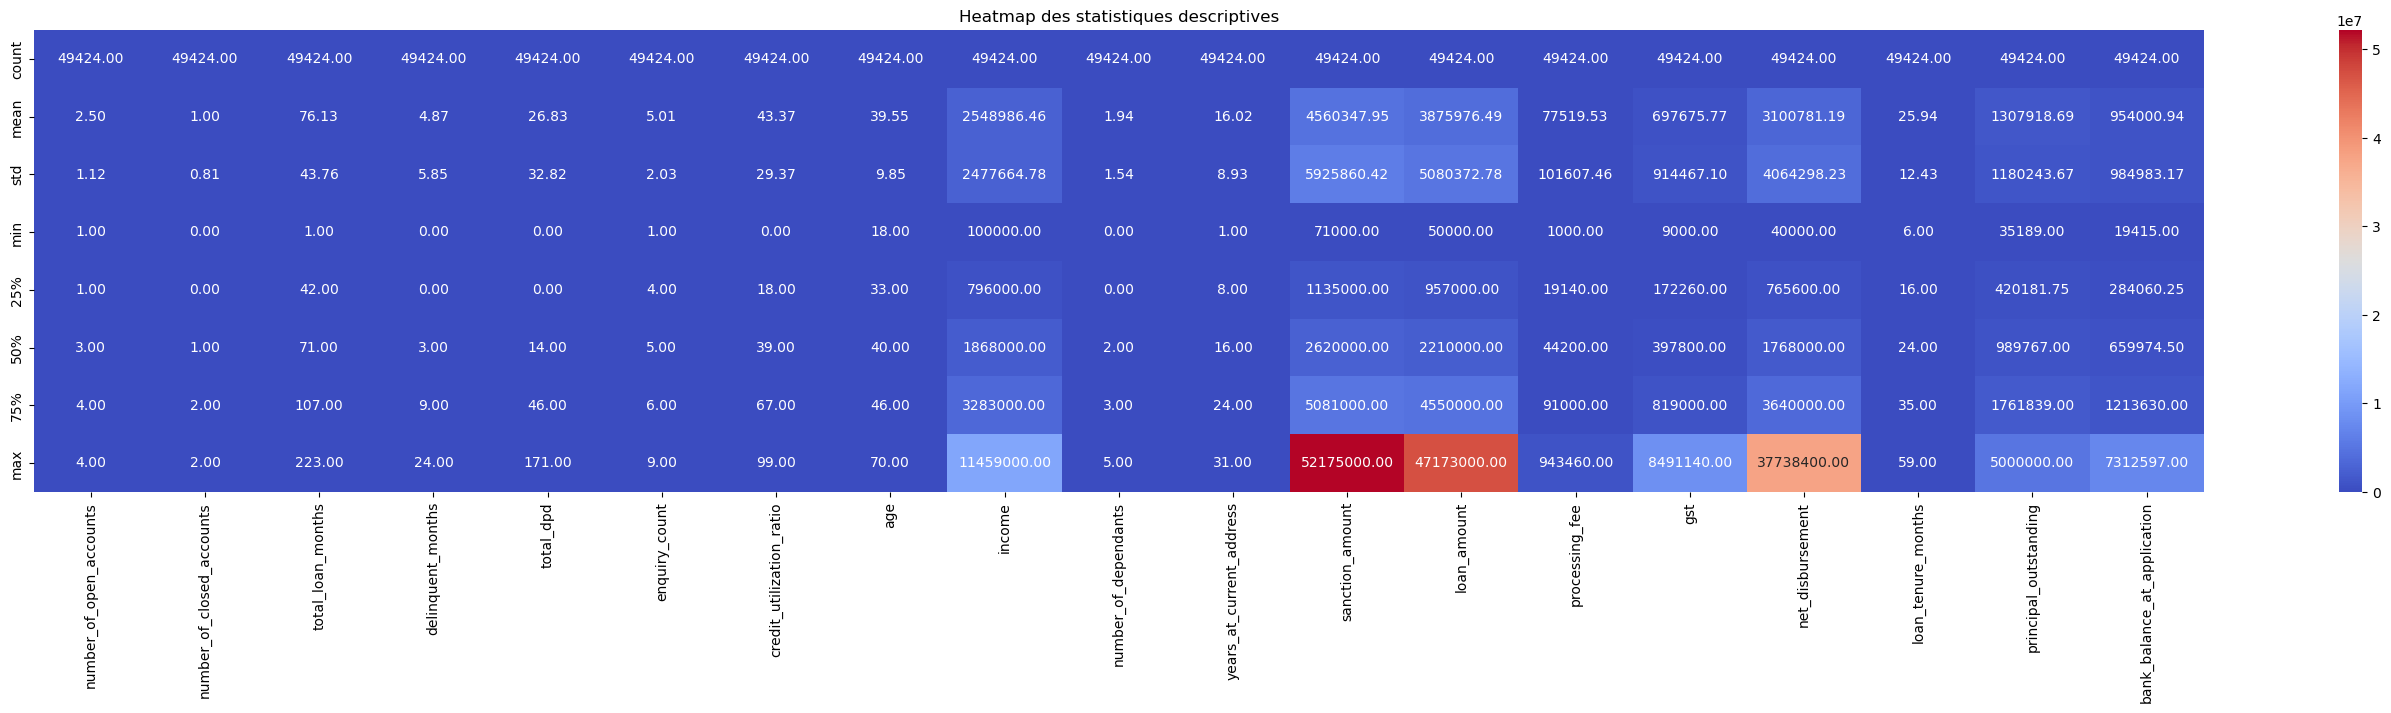

In [39]:
# Filtrer les colonnes numériques
numeric_data = df.select_dtypes(include=['number'])

# Générer les statistiques descriptives
summary_stats = numeric_data.describe()

# Tracer la heatmap
plt.figure(figsize=(35, 6))  # Ajuster la taille si nécessaire
sns.heatmap(summary_stats, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Heatmap des statistiques descriptives")
plt.show()

In [40]:
df.shape

(49424, 32)

In [41]:
df.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_purpose',
       'loan_type', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default'],
      dtype='object')

# **Analyse exploratoire des données(EDA)**

## **Analyse univariée**

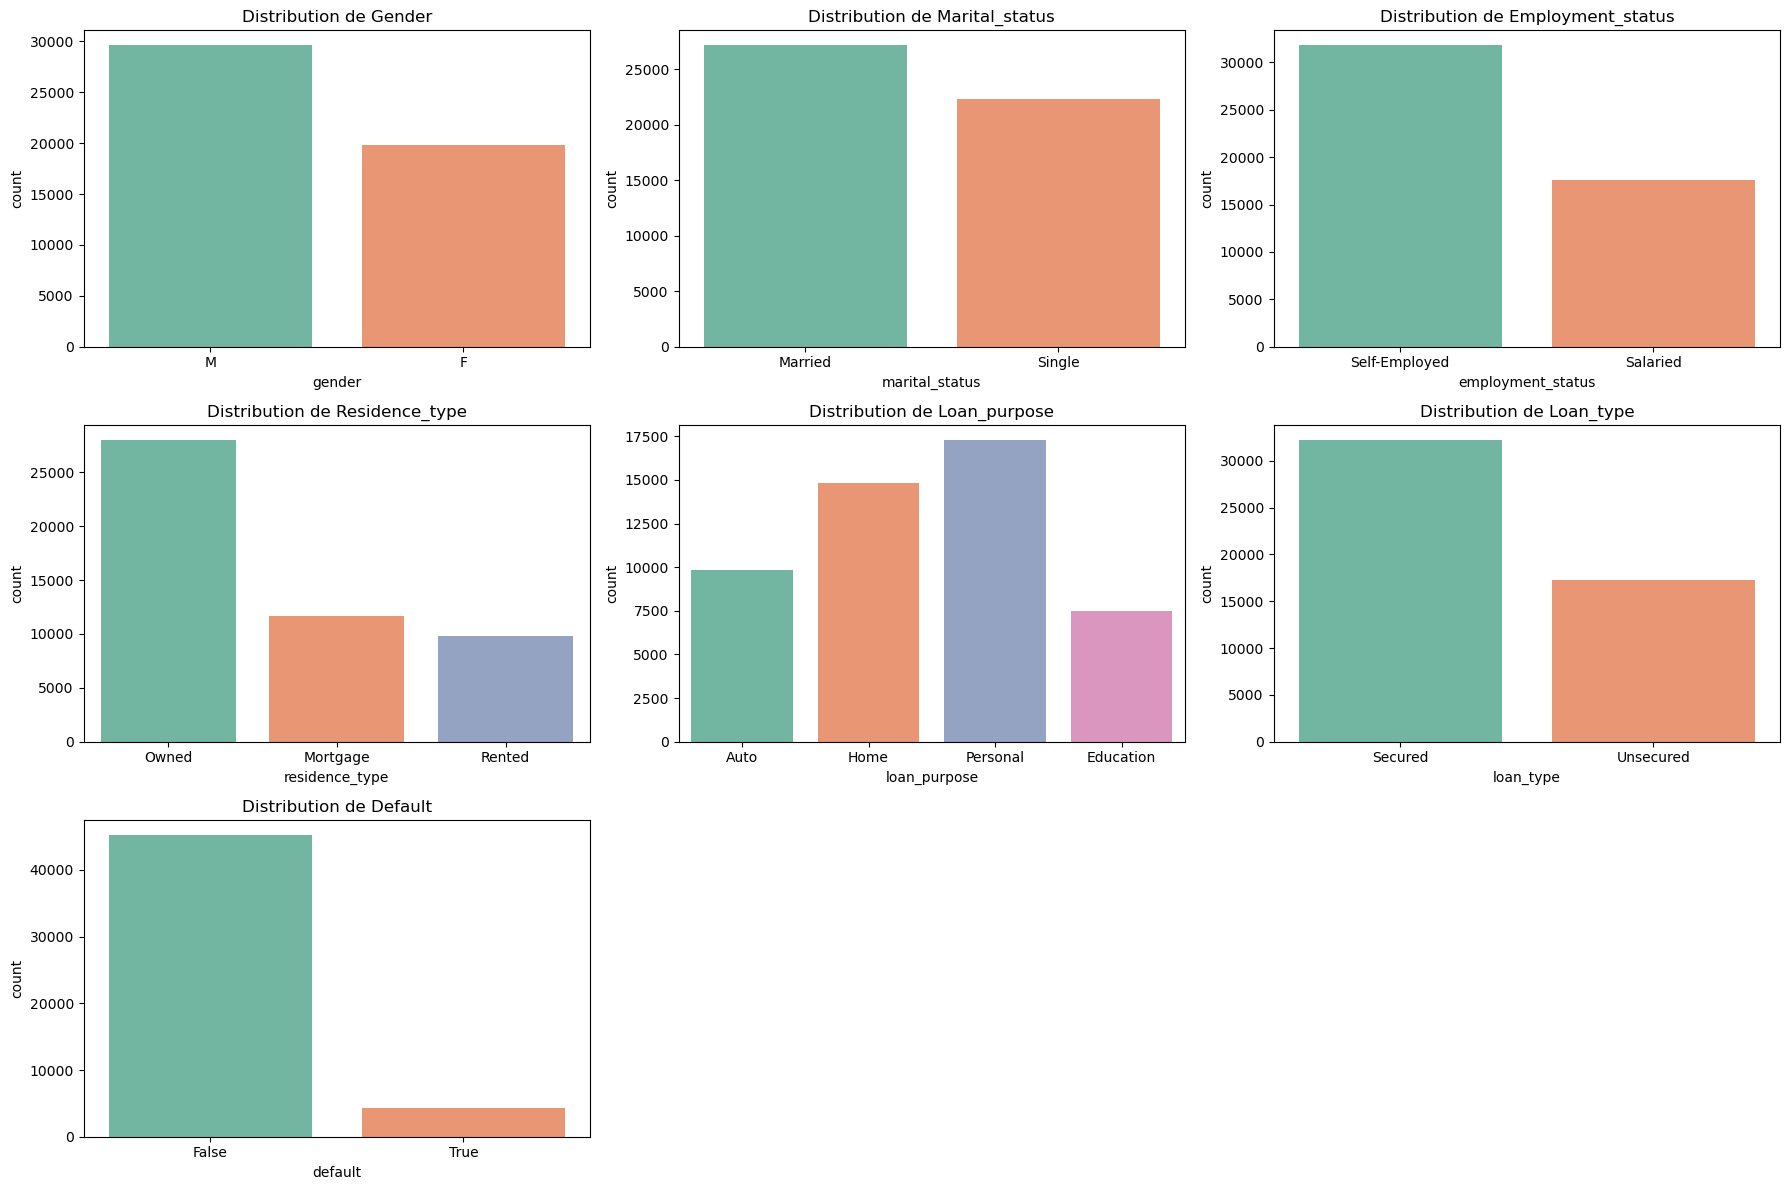

In [42]:
# Liste des colonnes catégorielles
cat_cols = ['gender', 'marital_status', 'employment_status', 'residence_type', 'loan_purpose', 'loan_type', 'default']

# Création d'une grille de sous-graphiques 3x3
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # Aplatir la grille pour un indexage plus simple

# Tracer la distribution de chaque colonne catégorielle
for i, column in enumerate(cat_cols):
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f"Distribution de {column.capitalize()}")

# Supprimer les sous-graphiques vides (le cas échéant)
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Ajuster la mise en page
plt.tight_layout()
plt.show()


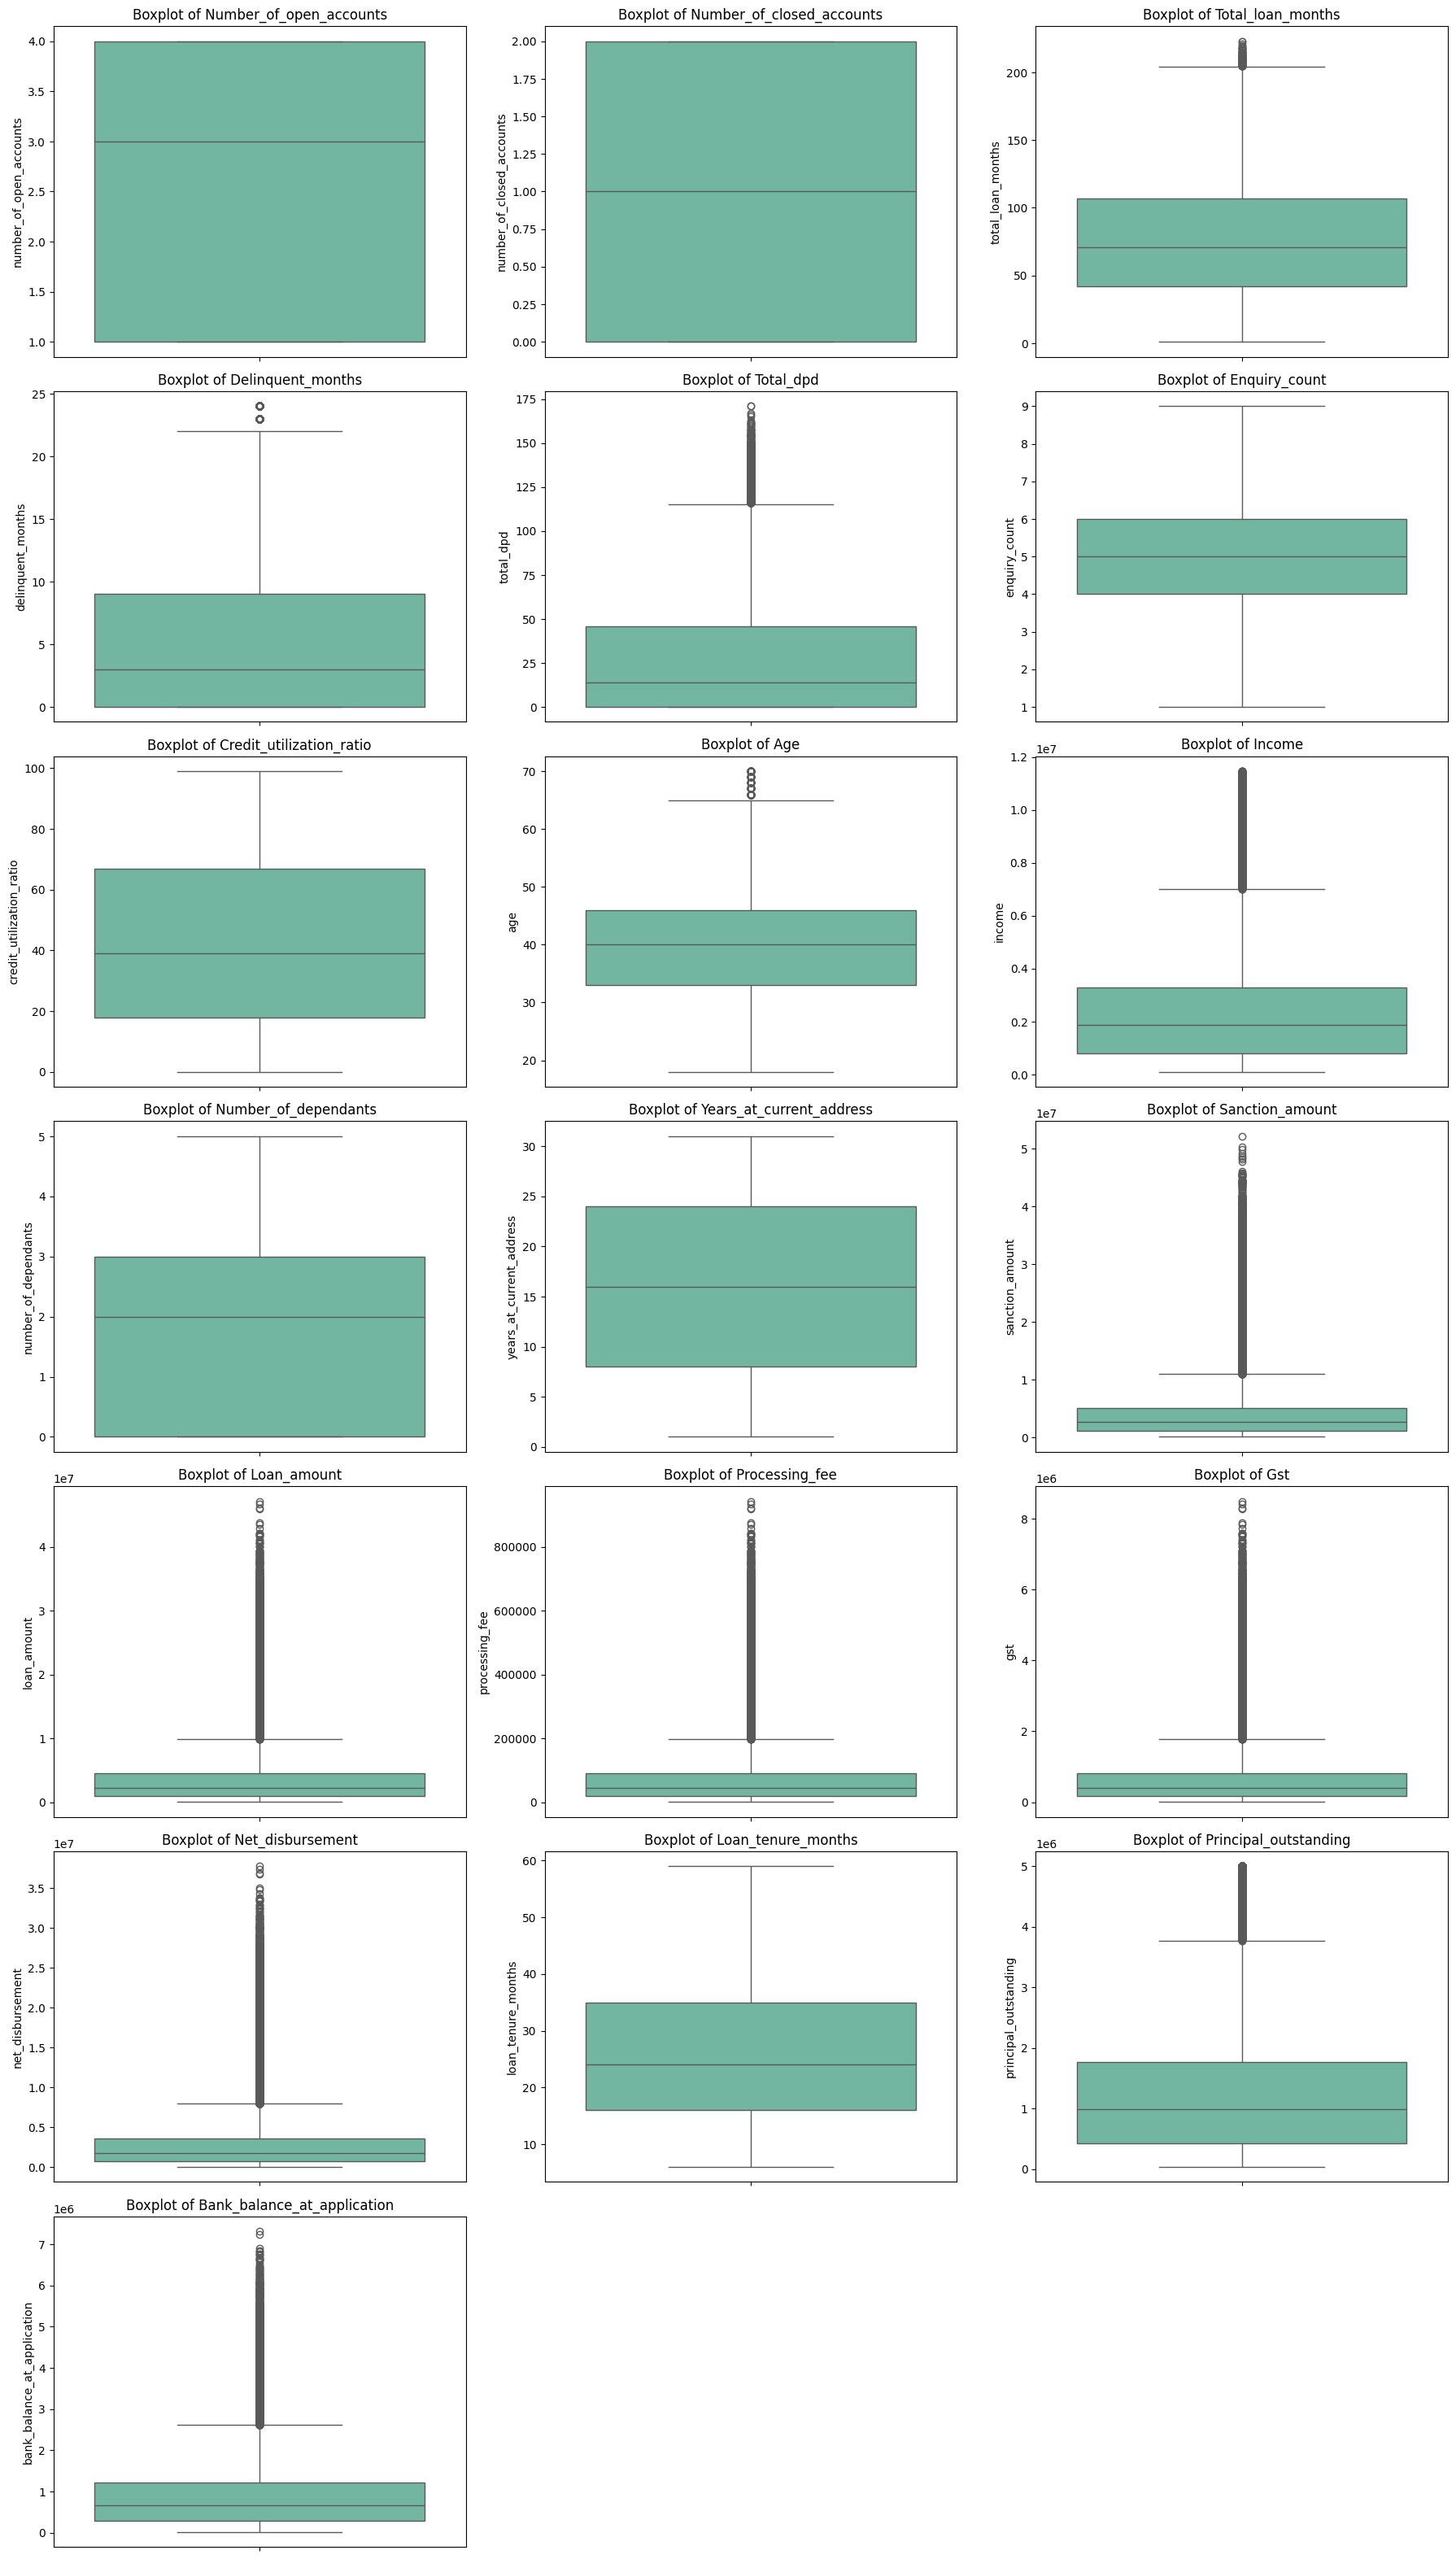

In [ ]:
# Liste des colonnes numériques
num_cols = df.select_dtypes(include=['number']).columns

# Création d'une grille de sous-graphiques 8x3
fig, axes = plt.subplots(8, 3, figsize=(18, 36))  # Ajuster la taille si nécessaire
axes = axes.flatten()  # Aplatir la grille pour un indexage plus simple

# Tracer chaque colonne numérique
for i, column in enumerate(num_cols):
    sns.boxplot(data=df, y=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f"Boîte à moustaches de {column.capitalize()}")

# Supprimer les sous-graphiques vides (le cas échéant)
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

# Ajuster la mise en page
plt.tight_layout()
plt.show()


## **Analyse bivariée**

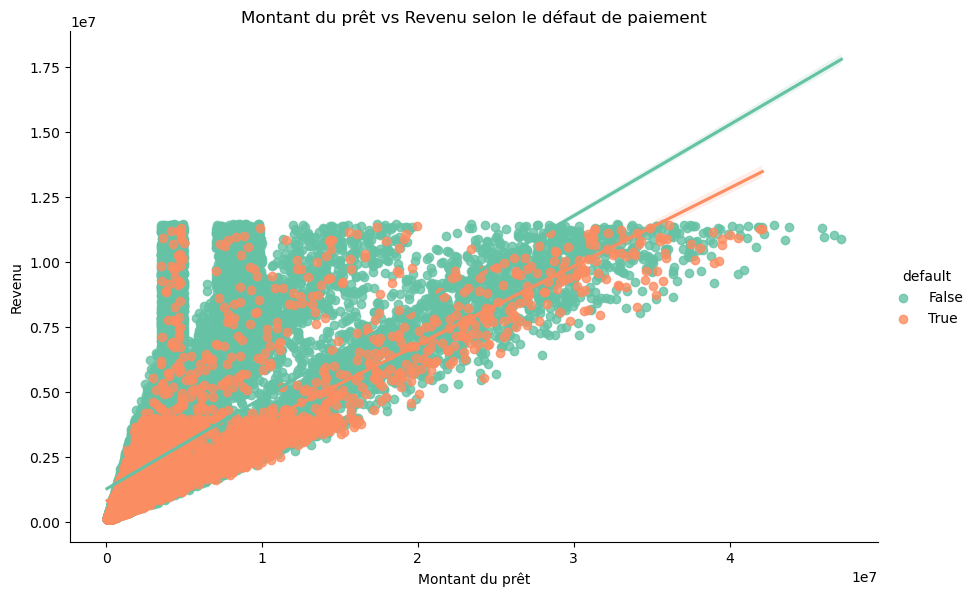

In [43]:
# Tracer un nuage de points avec régression linéaire
sns.lmplot(data=df, x='loan_amount', y='income', hue='default', palette='Set2', height=6, aspect=1.5)
plt.title('Montant du prêt vs Revenu selon le défaut de paiement')
plt.xlabel('Montant du prêt')
plt.ylabel('Revenu')
plt.show()


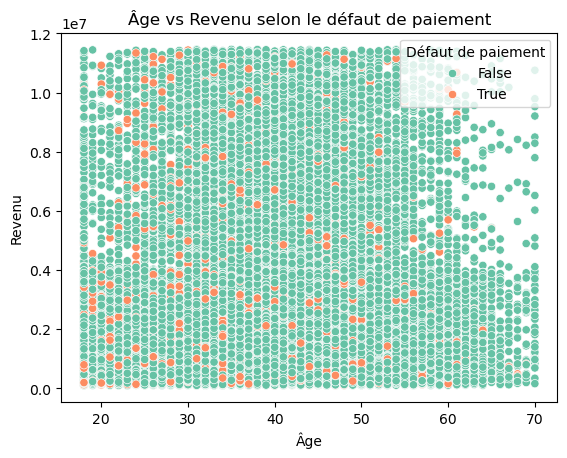

In [44]:
# Tracer un nuage de points pour Age et Revenu selon le défaut de paiement
sns.scatterplot(data=df, x='age', y='income', hue='default', palette='Set2')
plt.title('Âge vs Revenu selon le défaut de paiement')
plt.xlabel('Âge')
plt.ylabel('Revenu')
plt.legend(title='Défaut de paiement')
plt.show()


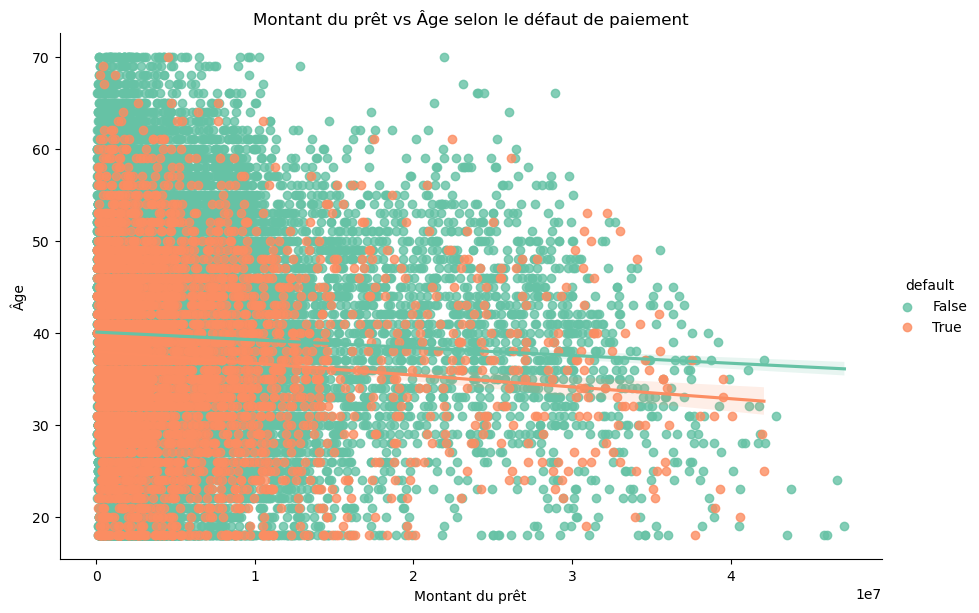

In [45]:
# Tracer un nuage de points avec régression linéaire pour le montant du prêt et l'âge selon le défaut de paiement
sns.lmplot(data=df, x='loan_amount', y='age', hue='default', palette='Set2', height=6, aspect=1.5)
plt.title('Montant du prêt vs Âge selon le défaut de paiement')
plt.xlabel('Montant du prêt')
plt.ylabel('Âge')
plt.show()


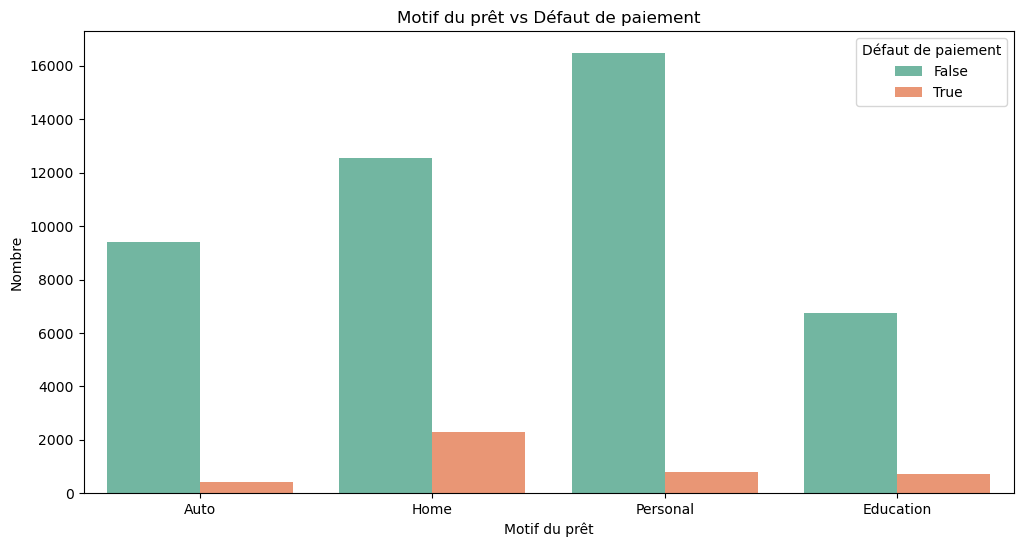

In [46]:
# Tracer la répartition des motifs de prêt selon le défaut de paiement
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan_purpose', hue='default', palette='Set2')
plt.title('Motif du prêt vs Défaut de paiement')
plt.xlabel('Motif du prêt')
plt.ylabel('Nombre')
plt.legend(title='Défaut de paiement')
plt.xticks(rotation=0)
plt.show()


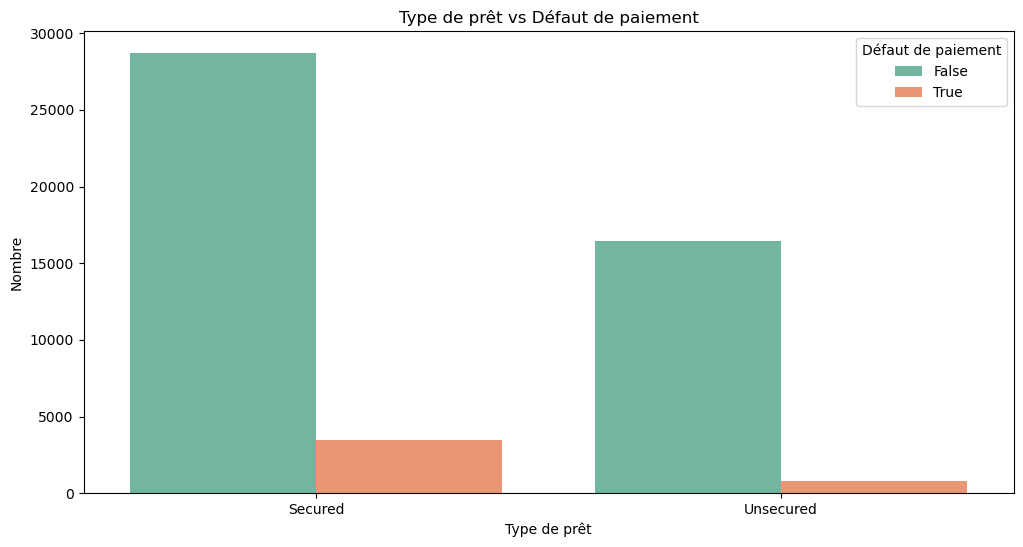

In [47]:
# Tracer la répartition des types de prêt selon le défaut de paiement
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan_type', hue='default', palette='Set2')
plt.title('Type de prêt vs Défaut de paiement')
plt.xlabel('Type de prêt')
plt.ylabel('Nombre')
plt.legend(title='Défaut de paiement')
plt.xticks(rotation=0)
plt.show()


default            False  True 
employment_status              
Salaried            0.91   0.09
Self-Employed       0.92   0.08


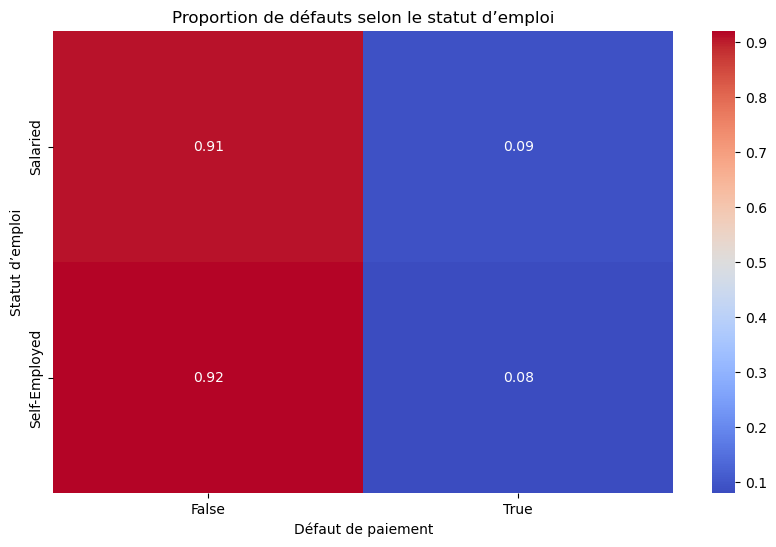

In [48]:
# Table de contingence : proportion de défauts selon le statut d'emploi
crosstab = np.round(pd.crosstab(df['employment_status'], df['default'], normalize='index'), 2)
print(crosstab)

# Heatmap pour la table de contingence
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='coolwarm', cbar=True)
plt.title('Proportion de défauts selon le statut d’emploi')
plt.ylabel('Statut d’emploi')
plt.xlabel('Défaut de paiement')
plt.show()


default         False  True 
marital_status              
Married          0.92   0.08
Single           0.91   0.09


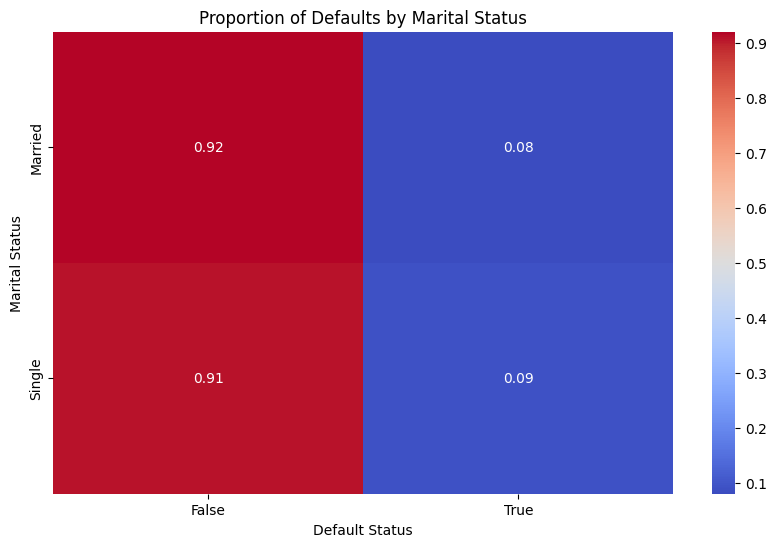

In [ ]:
crosstab = np.round(pd.crosstab(df['marital_status'], df['default'], normalize='index'), 2)  # Proportions by loan purpose
print(crosstab)

# Heatmap for cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='coolwarm', cbar=True)
plt.title('Proportion of Defaults by Marital Status')
plt.ylabel('Marital Status')
plt.xlabel('Default Status')
plt.show()

In [49]:
# Grouper les données
grouped_data = df.groupby(['city', 'state', 'zipcode', 'default'])['default'].count().reset_index(name='count')

grouped_data


,city,state,zipcode,default,count
0,Ahmedabad,Gujarat,380001,False,4491
1,Ahmedabad,Gujarat,380001,True,436
2,Bangalore,Karnataka,560001,False,4524
3,Bangalore,Karnataka,560001,True,429
4,Chennai,Tamil Nadu,600001,False,4503
5,Chennai,Tamil Nadu,600001,True,418
6,Delhi,Delhi,110001,False,4475
7,Delhi,Delhi,110001,True,417
8,Hyderabad,Telangana,500001,False,4560
9,Hyderabad,Telangana,500001,True,406


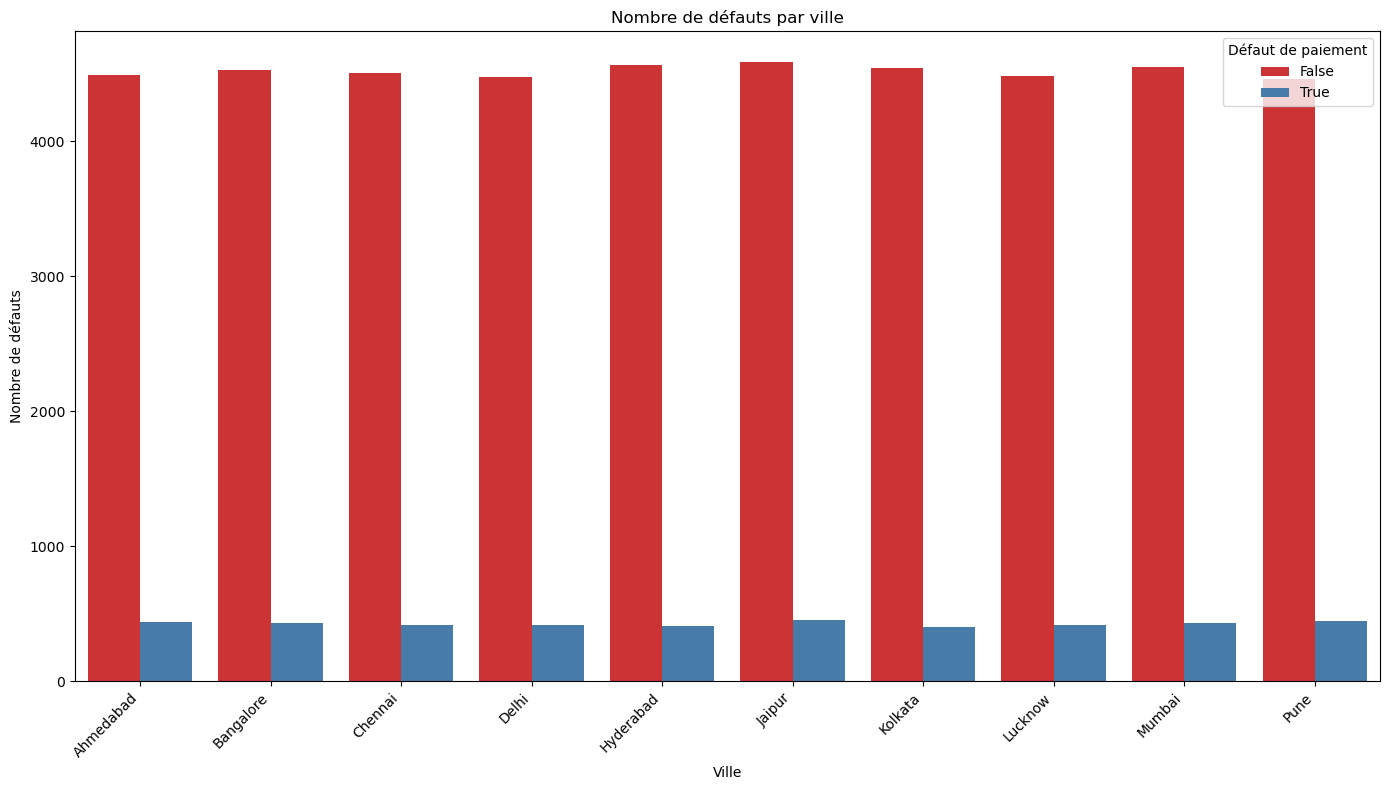

In [50]:
# Tracer le nombre de défauts par ville
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='city', y='count', hue='default', palette='Set1')
plt.title('Nombre de défauts par ville')
plt.xlabel('Ville')
plt.ylabel('Nombre de défauts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Défaut de paiement')
plt.tight_layout()
plt.show()


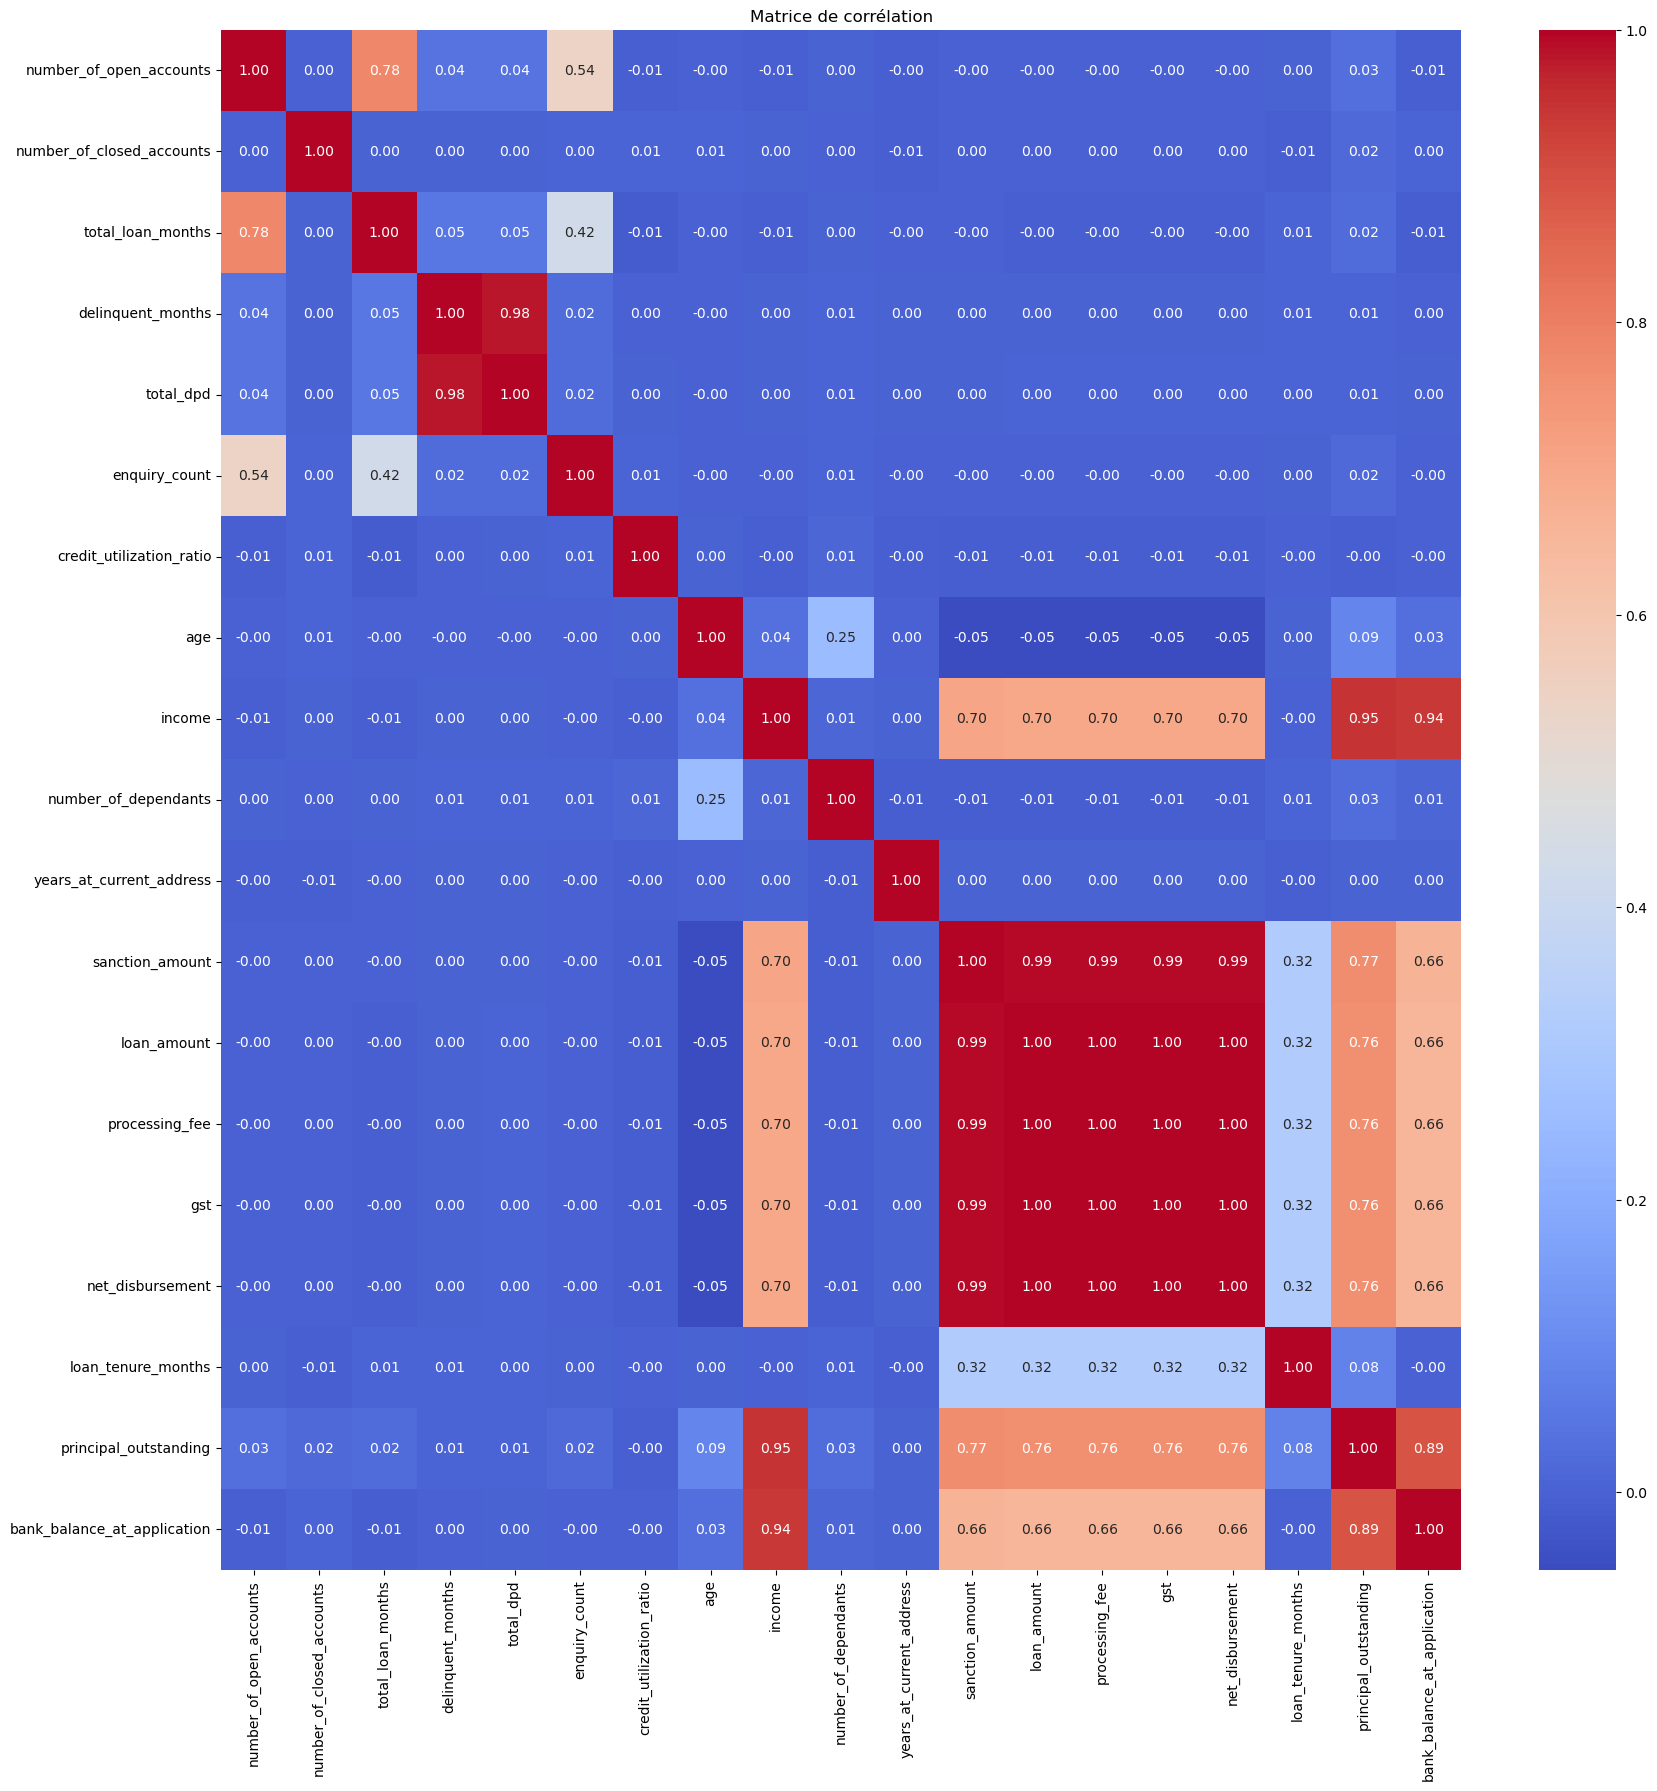

In [51]:
# Tracer la matrice de corrélation des variables numériques
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


In [52]:
df['default'].astype(float).dtypes

dtype('float64')

Corrélation avec le défaut de paiement :

default                        1.000000
credit_utilization_ratio       0.401528
total_dpd                      0.167152
delinquent_months              0.164397
loan_tenure_months             0.121169
gst                            0.085290
net_disbursement               0.085290
processing_fee                 0.085290
loan_amount                    0.085290
sanction_amount                0.078139
number_of_closed_accounts      0.008367
years_at_current_address       0.004983
enquiry_count                 -0.004781
number_of_dependants          -0.009071
principal_outstanding         -0.011563
bank_balance_at_application   -0.017595
income                        -0.020524
age                           -0.070556
number_of_open_accounts       -0.075074
total_loan_months             -0.102367
Name: default, dtype: float64


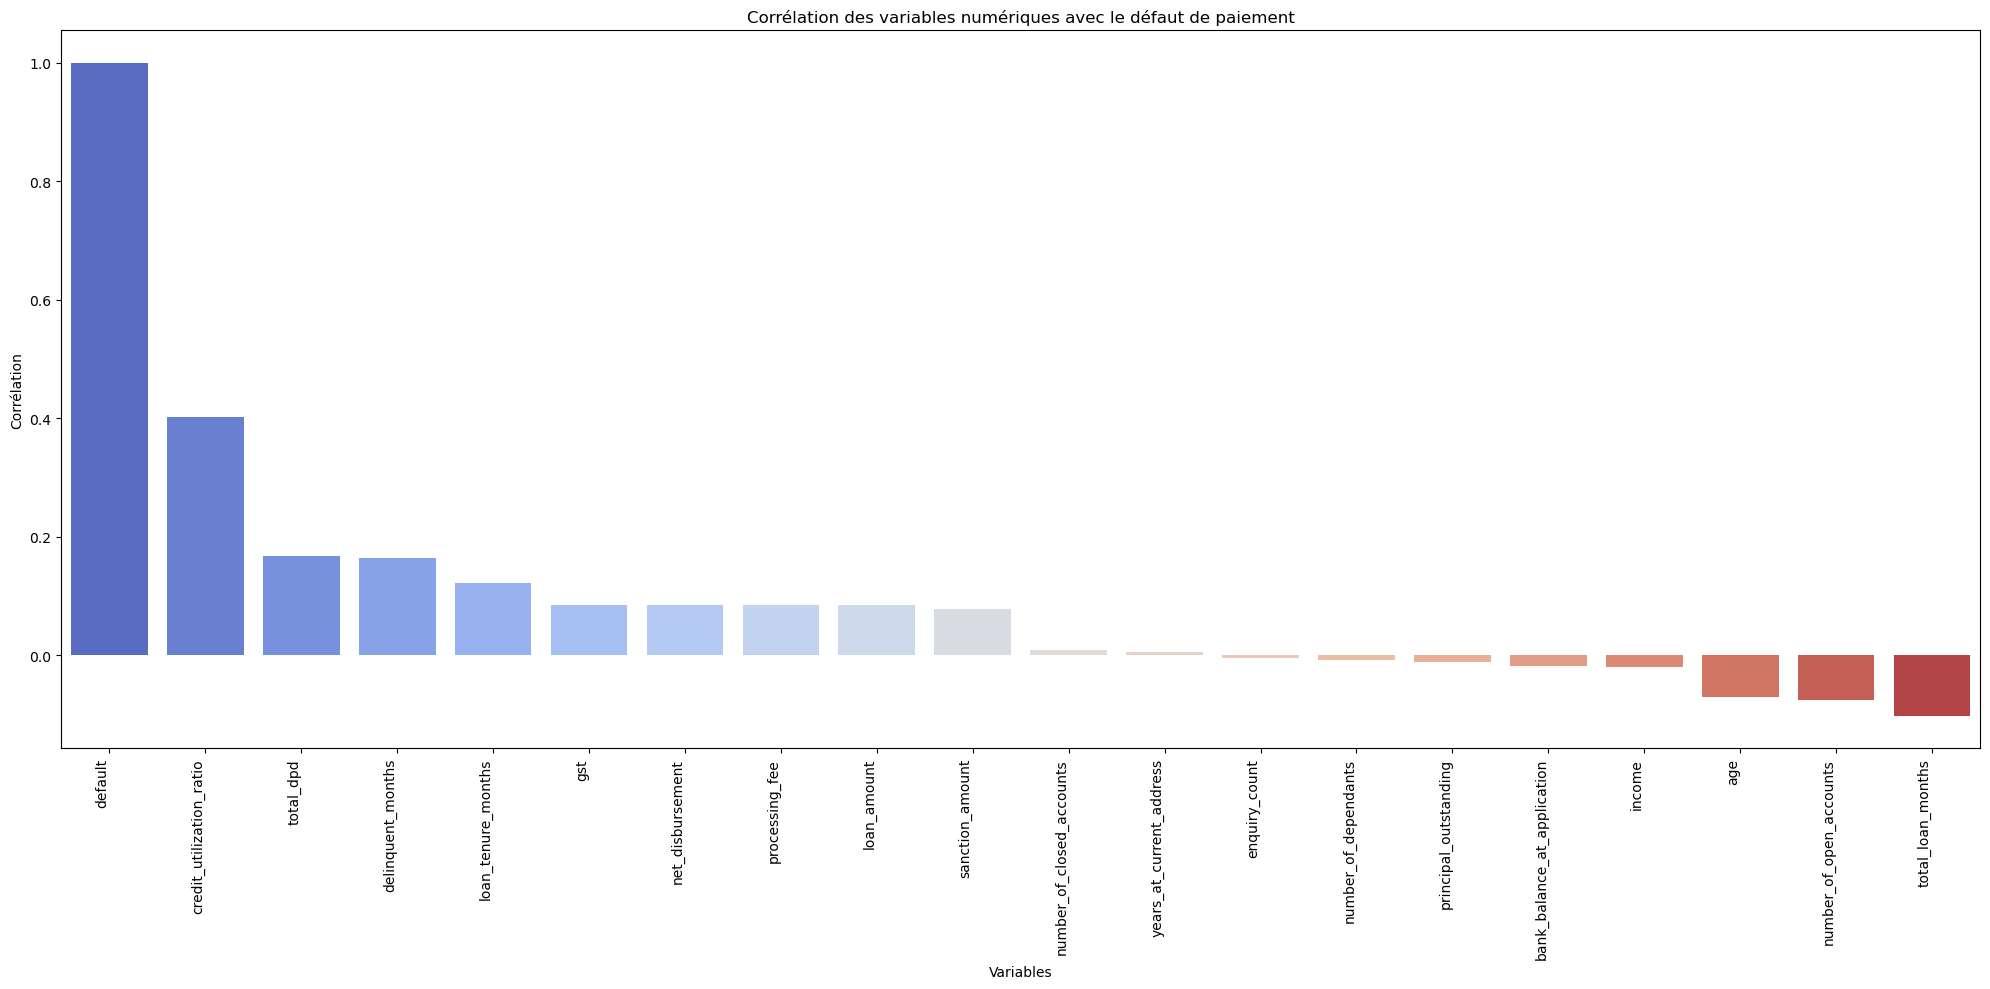

In [53]:
df1 = df.copy()

# S'assurer que la variable cible est numérique
df1['default'] = df1['default'].astype(float)

# Sélectionner uniquement les colonnes numériques
numeric_cols = df1.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_cols.corr()

# Extraire les corrélations avec la variable cible (default)
target_correlation = correlation_matrix['default'].sort_values(ascending=False)

# Afficher les corrélations
print("Corrélation avec le défaut de paiement :\n")
print(target_correlation)

# Visualiser les corrélations
plt.figure(figsize=(20, 10))
sns.barplot(x=target_correlation.index, y=target_correlation.values, palette='coolwarm')
plt.title('Corrélation des variables numériques avec le défaut de paiement')
plt.xlabel('Variables')
plt.ylabel('Corrélation')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [54]:
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [55]:
df.shape

(49424, 32)

In [56]:
df.to_csv('cleaned_data.csv')

# **Résumé**

##**Processus de gestion des valeurs aberrantes**

Ce processus de gestion des valeurs aberrantes combine des méthodes techniques et des connaissances métier afin de garantir l’intégrité des données :

1. **Méthode IQR** : Utilisée pour identifier et traiter les valeurs aberrantes dans les colonnes numériques en calculant des bornes inférieure et supérieure.

2. **Filtrage basé sur les quantiles** : Les valeurs extrêmes de certaines colonnes (par exemple, le revenu) ont été plafonnées à l’aide de seuils basés sur les quantiles afin de réduire l’impact des valeurs aberrantes.

3. **Variables dérivées** : Des variables supplémentaires comme `diff` (différence entre le montant du prêt et les frais de traitement) et `pct` (pourcentage des frais de traitement par rapport au montant du prêt) ont été calculées pour obtenir des insights plus approfondis.

4. **Validations basées sur la connaissance métier** :

   * GST plafonné à 20 % du montant du prêt.
   * Le décaissement net ne doit pas dépasser le montant du prêt moins la GST.
   * Le capital restant dû ne doit pas dépasser le montant du prêt.
   * Le solde bancaire à la demande doit être positif ou nul.

5. **Vérification composite de validité** : Combinaison de plusieurs règles dans un indicateur unique (`valid_loan`) pour garantir la cohérence globale des données.

6. **Résultat final** :

   * Nombre d’enregistrements de prêts invalides : Variables dérivées : **524**, Connaissance métier : **0**
   * Action : Suppression de ces enregistrements

Cette approche garantit que les anomalies statistiques et les incohérences spécifiques au domaine sont traitées efficacement.


##**Analyse univariée**

***1. Distribution des variables catégorielles***

Ces graphiques donnent un aperçu visuel de la distribution des différentes variables catégorielles dans le jeu de données sur les prêts. On observe que la majorité des emprunteurs sont des hommes et mariés, la plupart étant salariés. Le type de résidence le plus courant est la propriété, et les prêts auto sont le motif de prêt le plus fréquent. Les prêts garantis sont nettement plus répandus que les prêts non garantis. Enfin, la distribution de la variable cible "default" montre que la majorité des prêts n’ont pas été en défaut.


***2. Distribution des variables numériques***

Ces boxplots représentent visuellement la distribution des différentes variables numériques du jeu de données. La plupart des variables présentent une distribution asymétrique à droite, indiquant que la majorité des valeurs se concentre sur les faibles montants. Cependant, certaines variables comme le "montant du prêt" et les "frais de traitement" montrent une distribution plus uniforme.


##**Analyse bivariée**

***1. Montant du prêt vs Revenu selon le défaut de paiement***

Ce nuage de points montre la relation entre le montant du prêt et le revenu, les prêts plus élevés étant généralement associés à des revenus plus importants. Malgré cela, la majorité des prêts, quel que soit le niveau de revenu, ont été remboursés avec succès. Cependant, une proportion notable de défauts se produit chez les revenus élevés, suggérant que d’autres facteurs, comme l’historique de crédit ou le ratio dette/revenu, influencent fortement le risque de défaut.


***2. Montant du prêt vs Âge selon le défaut de paiement***

Ce nuage de points montre la relation entre le montant du prêt et l’âge, révélant que la majorité des emprunteurs ont entre 20 et 60 ans. Les emprunteurs plus âgés ont tendance à souscrire des prêts plus importants, mais la majorité des prêts, quel que soit l’âge, n’ont pas été en défaut. Cependant, une partie notable des défauts se produit chez les emprunteurs plus jeunes, suggérant que d’autres facteurs, comme l’historique de crédit ou le niveau de revenu, influencent le risque de défaut.


***3. Âge vs Revenu selon le défaut de paiement***

Ce nuage de points montre la relation entre l’âge et le revenu, avec des couleurs indiquant si un prêt a été en défaut ou non. Il n’y a pas de tendance claire, mais les défauts apparaissent sur une large gamme d’âges et de niveaux de revenu.


***4. Motif du prêt vs Défaut***

Ce diagramme en barres montre le nombre de prêts par motif (auto, maison, personnel, éducation) et si ces prêts ont été en défaut ou non. Globalement, la majorité des prêts n’ont pas été en défaut. Les prêts immobiliers présentent le plus grand nombre de défauts, tandis que les prêts auto ont le moins de défauts.


***5. Type de prêt vs Défaut***

Ce diagramme en barres montre le nombre de prêts garantis et non garantis, ainsi que leur statut de défaut. Les prêts garantis sont plus fréquents et présentent moins de défauts que les prêts non garantis.


***6. Proportion de défauts selon le statut d’emploi***

Cette heatmap montre la proportion de prêts en défaut et non en défaut pour les salariés et les indépendants. Les deux groupes présentent une forte proportion de prêts non en défaut, avec seulement un faible pourcentage de défauts. Cependant, les salariés ont un taux de défaut légèrement inférieur à celui des indépendants.


***7. Proportion de défauts selon le statut marital***

Cette heatmap montre la proportion de prêts en défaut et non en défaut pour les personnes mariées et célibataires. Les deux groupes présentent une forte proportion de prêts non en défaut, avec seulement un faible pourcentage de défauts. Les personnes mariées ont toutefois un taux de défaut légèrement inférieur à celui des célibataires.


***8. Nombre de défauts par ville***

Ce diagramme en barres montre le nombre de prêts en défaut et non en défaut pour différentes villes. Toutes les villes comptent plus de prêts non en défaut que de prêts en défaut. Mumbai présente le plus grand nombre de prêts en défaut et non en défaut.


***9. Analyse des corrélations***

Cette matrice de corrélation montre les relations entre les variables numériques. Les teintes claires indiquent une corrélation positive forte, tandis que les teintes foncées indiquent une corrélation négative forte. On observe plusieurs relations intéressantes : le montant du prêt, le montant accordé, les frais de traitement, la GST, le décaissement net et le capital restant dû sont fortement corrélés, ce qui suggère que ces variables sont étroitement liées. Le revenu et le montant du prêt sont également positivement corrélés, indiquant que les individus à revenu plus élevé tendent à emprunter davantage.
L’âge et le revenu montrent une corrélation positive modérée, tandis que le ratio d’utilisation du crédit est modérément corrélé aux mois de défaillance et au DPD total, suggérant qu’un ratio d’utilisation élevé est associé à un risque de défaut plus important. Globalement, la matrice de corrélation fournit des informations précieuses pour identifier des prédicteurs potentiels de défaut de paiement.


***10. Corrélation des variables numériques avec le défaut***

Cette analyse examine la relation entre les variables numériques et le défaut de paiement. Les résultats montrent qu’un ratio d’utilisation du crédit élevé est fortement lié à un risque accru de défaut, tandis que des durées de prêt plus longues ont l’effet inverse. D’autres facteurs, comme le montant du prêt ou la durée de l’historique de crédit, semblent avoir peu ou pas d’impact sur le risque de défaut. Une analyse complémentaire, comme le classement de l’importance des variables ou la modélisation, pourrait aider à mieux comprendre ce qui rend un prêt plus susceptible d’être en défaut.